# Comparing different types of filters:

Data collection:

In [1]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:

image_folder = '/content/original_images'

data = []

for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        img = cv2.imread(os.path.join(image_folder, filename))
        if img is not None:
            # Convert to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            data.append({'filename': filename, 'image': gray_img})

original = pd.DataFrame(data)

In [3]:
def add_salt_pepper_noise(image, prob):
    noisy_image = image.copy()

    num_salt = np.ceil(prob * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 1

    num_pepper = np.ceil(prob * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image

noise_levels = [0.01, 0.08, 0.2]

noisy_data = []

for index, row in original.iterrows():
    for level in noise_levels:
        noisy_img = add_salt_pepper_noise(row['image'], level)
        noisy_data.append({
            'filename': f"{row['filename']}_noise_{level}",
            'image': noisy_img,
            'noise_level': level
        })


salty = pd.DataFrame(noisy_data)

In [4]:
def add_gaussian_noise(image, var, mean=20):
    sigma = var**0.5
    gaussian_noise = np.random.normal(mean, sigma, image.shape)

    noisy_image = image + gaussian_noise

    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

gaussian_variances = [50, 100, 200]

noisy_data_gaussian = []

for index, row in original.iterrows():
    for var in gaussian_variances:
        noisy_img = add_gaussian_noise(row['image'], var=var)
        noisy_data_gaussian.append({
            'filename': f"{row['filename']}_gaussian_{var}",
            'image': noisy_img,
            'variance': var
        })

gaussian_noise = pd.DataFrame(noisy_data_gaussian)

In [5]:
Computational_times = {}
average_MSE = {}
average_psnr = {}

In [10]:
def calculate_mse(original, filtered):
    return np.mean((original - filtered) ** 2)

def calculate_psnr(mse, max_pixel=255.0):
    return 20 * np.log10(max_pixel) - 10 * np.log10(mse) if mse > 0 else float('inf')

# Box Filter:

In [6]:
def apply_box_filter(image, ksize=(5, 5)):
    filtered_image = cv2.boxFilter(image, ddepth=-1, ksize=ksize)
    return filtered_image

In [7]:
Computational_times['box filter'] = {}
average_MSE['box filter'] = {}
average_psnr['box filter'] = {}

In [25]:
Computational_times['box filter']['salt and pepper'] = []
average_MSE['box filter']['salt and pepper'] = []
average_psnr['box filter']['salt and pepper'] = []

In [26]:
start_time = time.time()

filtered_data = []

for index, row in salty.iterrows():
    filtered_img = apply_box_filter(row['image'], ksize=(5, 5))
    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['box filter']['salt and pepper'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [27]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['box filter']['salt and pepper'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['box filter']['salt and pepper'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 79.27544544603639
avarage psnr = 29.513939176505275


In [28]:
start_time = time.time()

filtered_data = []

for index, row in salty.iterrows():
    filtered_img = apply_box_filter(row['image'], ksize=(11, 11))
    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['box filter']['salt and pepper'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [29]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['box filter']['salt and pepper'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['box filter']['salt and pepper'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 86.54360995378096
avarage psnr = 29.039323335260278


In [30]:
Computational_times['box filter']['gaussian'] = []
average_MSE['box filter']['gaussian'] = []
average_psnr['box filter']['gaussian'] = []

In [31]:
start_time = time.time()

filtered_data = []

for index, row in gaussian_noise.iterrows():
    filtered_img = apply_box_filter(row['image'], ksize=(5, 5))
    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['box filter']['gaussian'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [32]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['box filter']['gaussian'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['box filter']['gaussian'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 92.44091176529274
avarage psnr = 28.69155170085817


In [33]:
start_time = time.time()

filtered_data = []

for index, row in gaussian_noise.iterrows():
    filtered_img = apply_box_filter(row['image'], ksize=(11, 11))
    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['box filter']['gaussian'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [34]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['box filter']['gaussian'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['box filter']['gaussian'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 92.70677240030038
avarage psnr = 28.60349364580841


In [43]:
print(Computational_times)
print(average_MSE)
print(average_psnr)

{'box filter': {'salt and pepper': [0.01754903793334961, 0.010097980499267578], 'gaussian': [0.008693218231201172, 0.008643150329589844]}, 'Gaussian filter': {'salt and pepper': [0.026183128356933594]}}
{'box filter': {'salt and pepper': [79.27544544603639, 86.54360995378096], 'gaussian': [92.44091176529274, 92.70677240030038]}, 'Gaussian filter': {'salt and pepper': []}}
{'box filter': {'salt and pepper': [29.513939176505275, 29.039323335260278], 'gaussian': [28.69155170085817, 28.60349364580841]}, 'Gaussian filter': {'salt and pepper': []}}


# Gaussian filter:

In [36]:
Computational_times['Gaussian filter'] = {}
average_MSE['Gaussian filter'] = {}
average_psnr['Gaussian filter'] = {}

In [37]:
Computational_times['Gaussian filter']['salt and pepper'] = []
average_MSE['Gaussian filter']['salt and pepper'] = []
average_psnr['Gaussian filter']['salt and pepper'] = []

In [38]:
def apply_gaussian_filter(image, ksize=(5, 5), sigma=1):
    filtered_image = cv2.GaussianBlur(image, ksize, sigma)
    return filtered_image

In [39]:
start_time = time.time()

filtered_data = []

for index, row in salty.iterrows():
    filtered_img = apply_gaussian_filter(row['image'], ksize=(5, 5), sigma=1)
    filtered_data.append({
        'filename': f"{row['filename']}_gaussian_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['Gaussian filter']['salt and pepper'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [44]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['Gaussian filter']['salt and pepper'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['Gaussian filter']['salt and pepper'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 68.55629655716312
avarage psnr = 30.27564963465619


In [45]:
start_time = time.time()

filtered_data = []

for index, row in salty.iterrows():
    filtered_img = apply_gaussian_filter(row['image'], ksize=(11, 11), sigma=1)
    filtered_data.append({
        'filename': f"{row['filename']}_gaussian_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['Gaussian filter']['salt and pepper'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [46]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['Gaussian filter']['salt and pepper'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['Gaussian filter']['salt and pepper'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 68.9694820107575
avarage psnr = 30.253101163014794


In [47]:
Computational_times['Gaussian filter']['gaussian'] = []
average_MSE['Gaussian filter']['gaussian'] = []
average_psnr['Gaussian filter']['gaussian'] = []

In [48]:
start_time = time.time()

filtered_data = []

for index, row in gaussian_noise.iterrows():
    filtered_img = apply_gaussian_filter(row['image'], ksize=(5, 5), sigma=1)
    filtered_data.append({
        'filename': f"{row['filename']}_gaussian_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['Gaussian filter']['gaussian'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [49]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['Gaussian filter']['gaussian'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['Gaussian filter']['gaussian'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 93.16125932199738
avarage psnr = 28.665735471794612


In [50]:
start_time = time.time()

filtered_data = []

for index, row in gaussian_noise.iterrows():
    filtered_img = apply_gaussian_filter(row['image'], ksize=(11, 11), sigma=1)
    filtered_data.append({
        'filename': f"{row['filename']}_gaussian_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['Gaussian filter']['gaussian'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [51]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['Gaussian filter']['gaussian'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['Gaussian filter']['gaussian'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 93.13898616725429
avarage psnr = 28.666914987229323


In [52]:
print(Computational_times)
print(average_MSE)
print(average_psnr)

{'box filter': {'salt and pepper': [0.01754903793334961, 0.010097980499267578], 'gaussian': [0.008693218231201172, 0.008643150329589844]}, 'Gaussian filter': {'salt and pepper': [0.026183128356933594, 0.022742271423339844], 'gaussian': [0.014070272445678711, 0.013068437576293945]}}
{'box filter': {'salt and pepper': [79.27544544603639, 86.54360995378096], 'gaussian': [92.44091176529274, 92.70677240030038]}, 'Gaussian filter': {'salt and pepper': [68.55629655716312, 68.9694820107575], 'gaussian': [93.16125932199738, 93.13898616725429]}}
{'box filter': {'salt and pepper': [29.513939176505275, 29.039323335260278], 'gaussian': [28.69155170085817, 28.60349364580841]}, 'Gaussian filter': {'salt and pepper': [30.27564963465619, 30.253101163014794], 'gaussian': [28.665735471794612, 28.666914987229323]}}


# Median filter:

In [72]:
Computational_times['median filter'] = {}
average_MSE['median filter'] = {}
average_psnr['median filter'] = {}

In [73]:
Computational_times['median filter']['salt and pepper'] = []
average_MSE['median filter']['salt and pepper'] = []
average_psnr['median filter']['salt and pepper'] = []

In [74]:
def apply_median_filter(image, ksize=5):
    filtered_image = cv2.medianBlur(image, ksize)
    return filtered_image

In [77]:
start_time = time.time()

filtered_data = []

for index, row in salty.iterrows():
    filtered_img = apply_median_filter(row['image'], ksize=5)
    filtered_data.append({
        'filename': f"{row['filename']}_gaussian_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['median filter']['salt and pepper'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [78]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['median filter']['salt and pepper'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['median filter']['salt and pepper'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 25.39650320913456
avarage psnr = 34.34935925105379


In [79]:
start_time = time.time()

filtered_data = []

for index, row in salty.iterrows():
    filtered_img = apply_median_filter(row['image'], ksize=11)
    filtered_data.append({
        'filename': f"{row['filename']}_gaussian_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['median filter']['salt and pepper'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [80]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['median filter']['salt and pepper'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['median filter']['salt and pepper'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 33.53542185231457
avarage psnr = 33.22502811713373


In [81]:
Computational_times['median filter']['gaussian'] = []
average_MSE['median filter']['gaussian'] = []
average_psnr['median filter']['gaussian'] = []

In [82]:
start_time = time.time()

filtered_data = []

for index, row in gaussian_noise.iterrows():
    filtered_img = apply_median_filter(row['image'], ksize=5)
    filtered_data.append({
        'filename': f"{row['filename']}_gaussian_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['median filter']['gaussian'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [83]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['median filter']['gaussian'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['median filter']['gaussian'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 92.23035709915735
avarage psnr = 28.723927539577105


In [84]:
start_time = time.time()

filtered_data = []

for index, row in gaussian_noise.iterrows():
    filtered_img = apply_median_filter(row['image'], ksize=11)
    filtered_data.append({
        'filename': f"{row['filename']}_gaussian_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['median filter']['gaussian'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [85]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['median filter']['gaussian'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['median filter']['gaussian'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 91.16955419857914
avarage psnr = 28.75128031263897


In [86]:
print(Computational_times)
print(average_MSE)
print(average_psnr)

{'box filter': {'salt and pepper': [0.01754903793334961, 0.010097980499267578], 'gaussian': [0.008693218231201172, 0.008643150329589844]}, 'Gaussian filter': {'salt and pepper': [0.026183128356933594, 0.022742271423339844], 'gaussian': [0.014070272445678711, 0.013068437576293945]}, 'median filter': {'salt and pepper': [0.032800912857055664, 0.16362214088439941], 'gaussian': [0.032048702239990234, 0.37059974670410156]}, 'adaptive mean filter': {'salt and pepper': []}}
{'box filter': {'salt and pepper': [79.27544544603639, 86.54360995378096], 'gaussian': [92.44091176529274, 92.70677240030038]}, 'Gaussian filter': {'salt and pepper': [68.55629655716312, 68.9694820107575], 'gaussian': [93.16125932199738, 93.13898616725429]}, 'median filter': {'salt and pepper': [25.39650320913456, 33.53542185231457], 'gaussian': [92.23035709915735, 91.16955419857914]}, 'adaptive mean filter': {'salt and pepper': []}}
{'box filter': {'salt and pepper': [29.513939176505275, 29.039323335260278], 'gaussian': [

# Adaptive mean filter:

In [66]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
import numpy as np
from scipy.ndimage import generic_filter
import numpy as np
from scipy.ndimage import convolve, median_filter

In [67]:
def adaptive_mean_filter(img, kernel_size, max_kernel_size=7):
    filtered_img = np.copy(img)

    for cur_size in range(kernel_size, max_kernel_size + 1, 2):
        local_region = median_filter(img[:, :], size=cur_size, mode='reflect')

        z_min = np.min(local_region)
        z_max = np.max(local_region)
        z_med = np.mean(local_region)

        if z_min < z_med < z_max:
            filtered_img[:, :] = np.where(
                (img[:, :] < z_min) | (img[:, :] > z_max), z_med, img[:, :]
            )
            break
        else:
            continue
    else:
        filtered_img[:, :] = z_med

    return filtered_img


In [68]:
Computational_times['adaptive mean filter'] = {}
average_MSE['adaptive mean filter'] = {}
average_psnr['adaptive mean filter'] = {}

In [69]:
Computational_times['adaptive mean filter']['salt and pepper'] = []
average_MSE['adaptive mean filter']['salt and pepper'] = []
average_psnr['adaptive mean filter']['salt and pepper'] = []

In [87]:
start_time = time.time()

filtered_data = []

for index, row in salty.iterrows():
    filtered_img = adaptive_mean_filter(row['image'], kernel_size=5,max_kernel_size=7)

    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['adaptive mean filter']['salt and pepper'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [88]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['adaptive mean filter']['salt and pepper'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['adaptive mean filter']['salt and pepper'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 9.17055448428608
avarage psnr = 40.902870272395475


In [89]:
start_time = time.time()

filtered_data = []

for index, row in salty.iterrows():
    filtered_img = adaptive_mean_filter(row['image'], kernel_size=11,max_kernel_size=15)

    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['adaptive mean filter']['salt and pepper'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [90]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['adaptive mean filter']['salt and pepper'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['adaptive mean filter']['salt and pepper'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 12.488213560014303
avarage psnr = 38.7766163983522


In [91]:
Computational_times['adaptive mean filter']['gaussian'] = []
average_MSE['adaptive mean filter']['gaussian'] = []
average_psnr['adaptive mean filter']['gaussian'] = []

In [92]:
start_time = time.time()

filtered_data = []

for index, row in gaussian_noise.iterrows():
    filtered_img = adaptive_mean_filter(row['image'], kernel_size=5,max_kernel_size=7)

    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['adaptive mean filter']['gaussian'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [93]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['adaptive mean filter']['gaussian'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['adaptive mean filter']['gaussian'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 87.73511403872736
avarage psnr = 28.923841415325587


In [94]:
start_time = time.time()

filtered_data = []

for index, row in gaussian_noise.iterrows():
    filtered_img = adaptive_mean_filter(row['image'], kernel_size=11,max_kernel_size=15)

    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['adaptive mean filter']['gaussian'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [95]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['adaptive mean filter']['gaussian'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['adaptive mean filter']['gaussian'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 87.84107266283833
avarage psnr = 28.91547936162378


In [96]:
print(Computational_times)
print(average_MSE)
print(average_psnr)

{'box filter': {'salt and pepper': [0.01754903793334961, 0.010097980499267578], 'gaussian': [0.008693218231201172, 0.008643150329589844]}, 'Gaussian filter': {'salt and pepper': [0.026183128356933594, 0.022742271423339844], 'gaussian': [0.014070272445678711, 0.013068437576293945]}, 'median filter': {'salt and pepper': [0.032800912857055664, 0.16362214088439941], 'gaussian': [0.032048702239990234, 0.37059974670410156]}, 'adaptive mean filter': {'salt and pepper': [1.0191903114318848, 3.2312936782836914], 'gaussian': [0.9807760715484619, 4.07667875289917]}}
{'box filter': {'salt and pepper': [79.27544544603639, 86.54360995378096], 'gaussian': [92.44091176529274, 92.70677240030038]}, 'Gaussian filter': {'salt and pepper': [68.55629655716312, 68.9694820107575], 'gaussian': [93.16125932199738, 93.13898616725429]}, 'median filter': {'salt and pepper': [25.39650320913456, 33.53542185231457], 'gaussian': [92.23035709915735, 91.16955419857914]}, 'adaptive mean filter': {'salt and pepper': [9.17

# Adaptive median filter:

In [97]:
def adaptive_median_filter(img, kernel_size, max_kernel_size=7):
    filtered_img = np.copy(img)

    for cur_size in range(kernel_size, max_kernel_size + 1, 2):
        local_region = median_filter(img[:, :], size=cur_size, mode='reflect')

        z_min = np.min(local_region)
        z_max = np.max(local_region)
        z_med = np.median(local_region)

        if z_min < z_med < z_max:
            filtered_img[:, :] = np.where(
                (img[:, :] < z_min) | (img[:, :] > z_max), z_med, img[:, :]
            )
            break
        else:
            continue
    else:
        filtered_img[:, :] = z_med

    return filtered_img


In [98]:
Computational_times['adaptive median filter'] = {}
average_MSE['adaptive median filter'] = {}
average_psnr['adaptive median filter'] = {}

In [99]:
Computational_times['adaptive median filter']['salt and pepper'] = []
average_MSE['adaptive median filter']['salt and pepper'] = []
average_psnr['adaptive median filter']['salt and pepper'] = []

In [100]:
start_time = time.time()

filtered_data = []

for index, row in salty.iterrows():
    filtered_img = adaptive_median_filter(row['image'], kernel_size=5,max_kernel_size=7)

    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['adaptive median filter']['salt and pepper'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [101]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['adaptive median filter']['salt and pepper'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['adaptive median filter']['salt and pepper'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 7.64350729088989
avarage psnr = 41.828651822227684


In [102]:
start_time = time.time()

filtered_data = []

for index, row in salty.iterrows():
    filtered_img = adaptive_median_filter(row['image'], kernel_size=11,max_kernel_size=15)

    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['adaptive median filter']['salt and pepper'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [103]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['adaptive median filter']['salt and pepper'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['adaptive median filter']['salt and pepper'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 8.625226519968642
avarage psnr = 40.18786271577876


In [104]:
Computational_times['adaptive median filter']['gaussian'] = []
average_MSE['adaptive median filter']['gaussian'] = []
average_psnr['adaptive median filter']['gaussian'] = []

In [105]:
start_time = time.time()

filtered_data = []

for index, row in gaussian_noise.iterrows():
    filtered_img = adaptive_median_filter(row['image'], kernel_size=5,max_kernel_size=7)

    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['adaptive median filter']['gaussian'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [106]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['adaptive median filter']['gaussian'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['adaptive median filter']['gaussian'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 87.45690669052698
avarage psnr = 28.947588622118346


In [107]:
start_time = time.time()

filtered_data = []

for index, row in gaussian_noise.iterrows():
    filtered_img = adaptive_median_filter(row['image'], kernel_size=11,max_kernel_size=15)

    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['adaptive median filter']['gaussian'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [108]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['adaptive median filter']['gaussian'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['adaptive median filter']['gaussian'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 87.49970844155779
avarage psnr = 28.945760010268934


In [109]:
print(Computational_times)
print(average_MSE)
print(average_psnr)

{'box filter': {'salt and pepper': [0.01754903793334961, 0.010097980499267578], 'gaussian': [0.008693218231201172, 0.008643150329589844]}, 'Gaussian filter': {'salt and pepper': [0.026183128356933594, 0.022742271423339844], 'gaussian': [0.014070272445678711, 0.013068437576293945]}, 'median filter': {'salt and pepper': [0.032800912857055664, 0.16362214088439941], 'gaussian': [0.032048702239990234, 0.37059974670410156]}, 'adaptive mean filter': {'salt and pepper': [1.0191903114318848, 3.2312936782836914], 'gaussian': [0.9807760715484619, 4.07667875289917]}, 'adaptive median filter': {'salt and pepper': [0.860196590423584, 3.7864882946014404], 'gaussian': [0.9615793228149414, 4.6729066371917725]}}
{'box filter': {'salt and pepper': [79.27544544603639, 86.54360995378096], 'gaussian': [92.44091176529274, 92.70677240030038]}, 'Gaussian filter': {'salt and pepper': [68.55629655716312, 68.9694820107575], 'gaussian': [93.16125932199738, 93.13898616725429]}, 'median filter': {'salt and pepper': 

# Bilateral filter:

In [110]:
Computational_times['bilateral filter'] = {}
average_MSE['bilateral filter'] = {}
average_psnr['bilateral filter'] = {}

In [112]:
Computational_times['bilateral filter']['salt and pepper'] = []
average_MSE['bilateral filter']['salt and pepper'] = []
average_psnr['bilateral filter']['salt and pepper'] = []

In [115]:
def apply_Bilateral_filter(image,scale=1, kernel_size=5,sigma_space=100, sigma_color=100):
  height,width = image.shape
  scaled_height = int(height*scale)
  scaled_width = int(width*scale)

  rescaled_image = cv2.resize(image,(scaled_width,scaled_height))

  filtered_image = cv2.bilateralFilter(rescaled_image,kernel_size,sigma_color,sigma_space)

  filtered_image = cv2.resize(filtered_image,(width,height,))

  return filtered_image

In [116]:
start_time = time.time()

filtered_data = []

for index, row in salty.iterrows():
    filtered_img = apply_Bilateral_filter(row['image'], kernel_size=5)

    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['bilateral filter']['salt and pepper'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [117]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['bilateral filter']['salt and pepper'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['bilateral filter']['salt and pepper'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 46.91489094559646
avarage psnr = 31.835928516397797


In [118]:
start_time = time.time()

filtered_data = []

for index, row in salty.iterrows():
    filtered_img = apply_Bilateral_filter(row['image'], kernel_size=11)

    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['bilateral filter']['salt and pepper'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [119]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['bilateral filter']['salt and pepper'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['bilateral filter']['salt and pepper'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 54.977402183792094
avarage psnr = 31.021815165896484


In [120]:
Computational_times['bilateral filter']['gaussian'] = []
average_MSE['bilateral filter']['gaussian'] = []
average_psnr['bilateral filter']['gaussian'] = []

In [121]:
start_time = time.time()

filtered_data = []

for index, row in gaussian_noise.iterrows():
    filtered_img = apply_Bilateral_filter(row['image'], kernel_size=5)

    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['bilateral filter']['gaussian'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [122]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['bilateral filter']['gaussian'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['bilateral filter']['gaussian'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 91.80272776110009
avarage psnr = 28.749776110453904


In [123]:
start_time = time.time()

filtered_data = []

for index, row in gaussian_noise.iterrows():
    filtered_img = apply_Bilateral_filter(row['image'], kernel_size=11)

    filtered_data.append({
        'filename': f"{row['filename']}_filtered",
        'image': filtered_img,
    })

end_time = time.time()

total_time = end_time - start_time
Computational_times['bilateral filter']['gaussian'].append(total_time)

filtered_images = pd.DataFrame(filtered_data)

In [124]:
counter = 0
mse_sum = 0
psnr_sum = 0

for index, row in original.iterrows():
    original_img = row['image']

    filtered_img_rows = filtered_images[filtered_images['filename'].str.contains(row['filename'])]

    for _, filtered_row in filtered_img_rows.iterrows():
        filtered_img = filtered_row['image']

        mse = calculate_mse(original_img, filtered_img)
        mse_sum += mse
        psnr = calculate_psnr(mse)
        psnr_sum += psnr

        counter +=1

avrg_mse = mse_sum/counter
average_MSE['bilateral filter']['gaussian'].append(avrg_mse)
print(f"avarage mse = {avrg_mse}")

avrg_psnr = psnr_sum/counter
average_psnr['bilateral filter']['gaussian'].append(avrg_psnr)
print(f"avarage psnr = {avrg_psnr}")

avarage mse = 91.67236280566765
avarage psnr = 28.700902510350968


In [125]:
print(Computational_times)
print(average_MSE)
print(average_psnr)

{'box filter': {'salt and pepper': [0.01754903793334961, 0.010097980499267578], 'gaussian': [0.008693218231201172, 0.008643150329589844]}, 'Gaussian filter': {'salt and pepper': [0.026183128356933594, 0.022742271423339844], 'gaussian': [0.014070272445678711, 0.013068437576293945]}, 'median filter': {'salt and pepper': [0.032800912857055664, 0.16362214088439941], 'gaussian': [0.032048702239990234, 0.37059974670410156]}, 'adaptive mean filter': {'salt and pepper': [1.0191903114318848, 3.2312936782836914], 'gaussian': [0.9807760715484619, 4.07667875289917]}, 'adaptive median filter': {'salt and pepper': [0.860196590423584, 3.7864882946014404], 'gaussian': [0.9615793228149414, 4.6729066371917725]}, 'bilateral filter': {'salt and pepper': [0.07159948348999023, 0.2841055393218994], 'gaussian': [0.10380411148071289, 0.30083584785461426]}}
{'box filter': {'salt and pepper': [79.27544544603639, 86.54360995378096], 'gaussian': [92.44091176529274, 92.70677240030038]}, 'Gaussian filter': {'salt an

# Results and Discussion:

In [131]:
# Convert each dictionary to a DataFrame and display
timing_df = pd.DataFrame(Computational_times).T
psnr_df = pd.DataFrame(average_psnr).T
mse_df = pd.DataFrame(average_MSE).T

# Rename columns for clarity
timing_df.columns = pd.MultiIndex.from_product([['Salt and Pepper', 'Gaussian']])
psnr_df.columns = pd.MultiIndex.from_product([['Salt and Pepper', 'Gaussian']])
mse_df.columns = pd.MultiIndex.from_product([['Salt and Pepper', 'Gaussian']])

In [128]:
print(timing_df.head())

                                                     salt and pepper  \
box filter               [0.01754903793334961, 0.010097980499267578]   
Gaussian filter         [0.026183128356933594, 0.022742271423339844]   
median filter            [0.032800912857055664, 0.16362214088439941]   
adaptive mean filter        [1.0191903114318848, 3.2312936782836914]   
adaptive median filter       [0.860196590423584, 3.7864882946014404]   

                                                            gaussian  
box filter              [0.008693218231201172, 0.008643150329589844]  
Gaussian filter         [0.014070272445678711, 0.013068437576293945]  
median filter            [0.032048702239990234, 0.37059974670410156]  
adaptive mean filter          [0.9807760715484619, 4.07667875289917]  
adaptive median filter      [0.9615793228149414, 4.6729066371917725]  


In [132]:
display(timing_df)

,Salt and Pepper,Gaussian
box filter,"[0.01754903793334961, 0.010097980499267578]","[0.008693218231201172, 0.008643150329589844]"
Gaussian filter,"[0.026183128356933594, 0.022742271423339844]","[0.014070272445678711, 0.013068437576293945]"
median filter,"[0.032800912857055664, 0.16362214088439941]","[0.032048702239990234, 0.37059974670410156]"
adaptive mean filter,"[1.0191903114318848, 3.2312936782836914]","[0.9807760715484619, 4.07667875289917]"
adaptive median filter,"[0.860196590423584, 3.7864882946014404]","[0.9615793228149414, 4.6729066371917725]"
bilateral filter,"[0.07159948348999023, 0.2841055393218994]","[0.10380411148071289, 0.30083584785461426]"


In [134]:
# Expand each column to have two sub-columns ('kernel=5' and 'kernel=11')
timing_df_expanded = pd.concat([timing_df[col].apply(pd.Series) for col in timing_df.columns], axis=1)
psnr_df_expanded = pd.concat([psnr_df[col].apply(pd.Series) for col in psnr_df.columns], axis=1)
mse_df_expanded = pd.concat([mse_df[col].apply(pd.Series) for col in mse_df.columns], axis=1)

# Create new multi-level column index
timing_df_expanded.columns = pd.MultiIndex.from_product([['Salt and Pepper', 'Gaussian'], ['kernel=5', 'kernel=11']])
psnr_df_expanded.columns = pd.MultiIndex.from_product([['Salt and Pepper', 'Gaussian'], ['kernel=5', 'kernel=11']])
mse_df_expanded.columns = pd.MultiIndex.from_product([['Salt and Pepper', 'Gaussian'], ['kernel=5', 'kernel=11']])

In [139]:
print("convulotion time (seconds):")
display(timing_df_expanded)

convulotion time (seconds):


Salt and Pepper            Gaussian          
                              kernel=5 kernel=11  kernel=5 kernel=11
box filter                    0.017549  0.010098  0.008693  0.008643
Gaussian filter               0.026183  0.022742  0.014070  0.013068
median filter                 0.032801  0.163622  0.032049  0.370600
adaptive mean filter          1.019190  3.231294  0.980776  4.076679
adaptive median filter        0.860197  3.786488  0.961579  4.672907
bilateral filter              0.071599  0.284106  0.103804  0.300836

Simple filters like box filter, Gaussian filter, and median filter took mere fractions of a second to complete their run, with the box filter being the fastest, due to it being the simplest.




In advance filters like adaptive mean filter, adaptive median filter, and bilateral filter. The bilateral filter was the fastest of them, yet still took longer computational time compared to simple filters. The adaptive filters took even longer time to complete their run.




Moreover, with adaptive filters increasing the kernel size increases the computational time exponentially, unlike simple filters.




While adaptive filters indeed preserve the edges/details much better than the other filters, they are much more expensive computationally. and that compared on a few low resolution images, imagen using them on high resolution images, or even a video.

The bilateral filter although kept in mind preserving the edges/details, takes shorter computational time, because it doesn't depend on changing the kernal size, more than once, for each pixel in the image. Its mathematical equation ensures the preservation of edges and the soothing of noise in the same step, unlike advanced filters.




Even for high resolution images bilateral filters still perform well in reasonable time.

In [142]:
print("average MSEs:")
display(mse_df_expanded)

average MSEs:


Salt and Pepper              Gaussian           
                              kernel=5  kernel=11   kernel=5  kernel=11
box filter                   79.275445  86.543610  92.440912  92.706772
Gaussian filter              68.556297  68.969482  93.161259  93.138986
median filter                25.396503  33.535422  92.230357  91.169554
adaptive mean filter          9.170554  12.488214  87.735114  87.841073
adaptive median filter        7.643507   8.625227  87.456907  87.499708
bilateral filter             46.914891  54.977402  91.802728  91.672363

When dealing with salt and pepper noise, the box filter has the largest average MSE, as its simplicity doesn't allow it to remove the outlier effectively. The Gaussian filter did better but not much, as it worked on bringing the pixels values closer to their neighbors, but not on removing outliers. And the median filter while removing the outliers, did damage the edges, especially with large kernel sizes.




Moving to the adaptive filter. The adaptive mean filter did much better than the median filter, the best filter from the simple filters. While the adaptive median filter performed even better. Although they took longer to run and process the images, they were able to effectively remove the noise, and preserve the edges.




The bilateral filter did better than the box and Gaussian filter, as it works on preserving the edges, and blurring the noise. It still performed worse than the median filter, because it's an improvement on the Gaussian filter, meaning it also works on smoothing the image, by bringing the pixels values closer, and doesn't remove outliers.

Dealing with Gaussian noise is more tricky. As the noise tends to be in values close to the pixels' true values, and most of it can't be regarded as outliers. All we could notice is that visually the Gaussian filter, and the bilateral filter managed to produce images that are more visually appealing than other filters. As they smoothed the images better.




Nevertheless, the bilateral filter preserves the edges better. Hence why if the smoothing of the images is a first step before using an edge detection algorithm, the bilateral filter is preferred.

In [144]:
print("average PSNRs (dB):")
display(psnr_df_expanded)

average PSNRs (dB):


Salt and Pepper              Gaussian           
                              kernel=5  kernel=11   kernel=5  kernel=11
box filter                   29.513939  29.039323  28.691552  28.603494
Gaussian filter              30.275650  30.253101  28.665735  28.666915
median filter                34.349359  33.225028  28.723928  28.751280
adaptive mean filter         40.902870  38.776616  28.923841  28.915479
adaptive median filter       41.828652  40.187863  28.947589  28.945760
bilateral filter             31.835929  31.021815  28.749776  28.700903

Peak Signal-to-Noise Ratio, is a measure of the quality of a processed image compared to an original image. It's commonly used in image processing to evaluate how well a process has preserved the visual quality of an image after transformation.

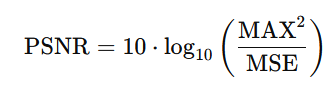

Higher PSNR values indicate better image quality (less difference between the original and processed images). High values typically range from 30 to 50 dB for good-quality images.

It's easy to see that the adaptive (in processing images with salt and pepper noise) produced images with higher quality than the other filters. Consequently, all of them preserve the images' details much better. While at the same time removing outliers and smoothing the image.

# Colclusion:

It's hard to say confidently that there's a filter better than the other, and it's clear that there's no perfect filter for all cases.




For a simple application that doesn't depend on very short computational time, the box filter may be the better choice. If said application still needs short computational time, but needs to blur the images more, to produce more visually appealing images, the Gassian filter becomes the first choice to consider.




If the images suffer from salt and pepper noise, or other noise that produces too much outliers, and a short computational time is still needed, the median filter is an ideal choice for this scenario.

But all these choices fail if the input images contain too much noise, and processing them is a first step before feeding them into another model, which may need to perform edge detection or the like on them.

Remove the high levels of noise while simultaneously preserving edges is outside of these simple filters' abilities.




In this case a tradeoff needs to happen. Sacrificing computational time in order to choose one of the more advanced filters that can perform the needed job.




If the computational time still needs to be reasonable, and the application needs to output smooth visually appealing images, the bilateral filter is a fit solution.




If the images suffer from too much outliers, the adaptive median filter will do a better job processing the images.




All these filters have parameters like kernel size that affect their performance, allowing them to be suitable for a wide range of applications. But as always for better performance a longer computational time is needed.

There's no one correct answer for "what filter should I use"?